In [78]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data_train = pd.read_csv('/content/adult_train.csv')
data_train.head()

In [ ]:
data_test = pd.read_csv('/content/adult_test.csv')
data_test.head()

Dividing the TRAINING dataset into X_train and Y_train and TESTING dataset into X_test and Y_test

In [62]:
X_train = data_train.drop(columns=['target'])
Y_train = data_train['target']

In [63]:
X_test = data_test.drop(columns=['target'])
Y_test = data_test['target']

In [64]:
# Coverting the modified dataframe, X_train into a dictionary to use "DictVectorizer"
training_dict = X_train.to_dict('records')

In [65]:
# Coverting the modified dataframe, X_test into a dictionary to use "DictVectorizer"
testing_dict = data_test.to_dict('records')

**Below are the function definitions of two functions for, DecisionTreeClassifier and RandomForestClassifier. Both the functions utilizes pipelines as mentioned the assignment description.**



*   For decision tree classifier, the range of max_depth is set to (1,13) as mentioned in the assignmnet 1.
*   For random forest classifier, the decision tree classifier in the previous function is replaced with a random forest classifier. Additionally, the hyperparameter "n_estimators" is also set to a range of (1,101). Having more range increased the training time. As specified in the assignment description, the parameter "n_jobs" is to set "-1" inorder to utilize all the CPU cores.


As already mentioned, these functions utilize "pipeline" with a "DictVectorizer" and the corresponding classifier with their corresponding hyperparameters.

NOTE: **When calling the function, the arguments "xtrain" and "xtest" for the functions should not be given as "X_train" and "X_test". This is because the DictVectorizer works on dictionaries not dataframes. When dataframes are used, errors like "AttributeError: 'csr_matrix' object has no attribute 'items'" and "AttributeError: 'str' object has no attribute 'items'" are thrown. This is because python dataframes do not have a method to operate on dictionary items(), which is called when using a DictVectorizer.**



In [1]:
def plot_evaluation_DTC(xtrain, ytrain, xtest, ytest):
  # setting the range of max_depth to (1,13)
  values_max_depths = range(1,13)
  training_scores, testing_scores = [], []
  for max_depth in values_max_depths:
    # Creating a pipeline as mentioned in the assignment description
    pipeline = make_pipeline( DictVectorizer(), DecisionTreeClassifier(max_depth=max_depth))
    # Fitting the training data using pipeline.fit()
    pipeline.fit(xtrain, ytrain)
    # Predicting using pipeline.predict() on xtrain
    predict_train = pipeline.predict(xtrain)
    # calculating accuracy for train using accuracy_score()
    accuracy_train = accuracy_score(ytrain,predict_train)
    training_scores.append(accuracy_train)

    # Predicting using pipeline.predict() on xtest
    predict_test = pipeline.predict(xtest)
    # calculating accuracy for test using accuracy_score()
    accuracy_test = accuracy_score(ytest, predict_test)
    testing_scores.append(accuracy_test)
  print("Accuracy scores for DTC - Training",training_scores)
  print('Accuracy scores for DTC - Testing',testing_scores)

  plt.figure(figsize=(10,6))
  plt.plot(values_max_depths, training_scores, label='Training', marker='x')
  plt.plot(values_max_depths, testing_scores, label='Testing', marker='o')
  plt.title('Score VS Depth : DecisionTreeClassifier')
  plt.xlabel('max_depth')
  plt.ylabel('Accuracy')
  plt.xticks(values_max_depths, rotation='horizontal')
  plt.legend()
  plt.show()

def plot_evaluation_RFC(xtrain, ytrain, xtest, ytest):
  # setting the range of max_depth to (1,13)
  values_max_depths = range(1,13)
  values_n_estimators = range(1, 101)
  for n_estimators in values_n_estimators:
    training_scores, testing_scores = [], []
    for max_depth in values_max_depths:
      # Creating a pipeline as mentioned in the assignment description
      pipeline = make_pipeline( DictVectorizer(), RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators,n_jobs=-1))
      # Fitting the training data using pipeline.fit()
      pipeline.fit(xtrain, ytrain)
      # Predicting using pipeline.predict() on xtrain
      predict_train = pipeline.predict(xtrain)
      # calculating accuracy for train using accuracy_score()
      accuracy_train = accuracy_score(ytrain,predict_train)
      training_scores.append(accuracy_train)

      # Predicting using pipeline.predict() on xtest
      predict_test = pipeline.predict(xtest)
      # calculating accuracy for test using accuracy_score()
      accuracy_test = accuracy_score(ytest, predict_test)
      testing_scores.append(accuracy_test)
  print("Accuracy scores for RFC- Training",training_scores)
  print('Accuracy scores for RFC - Testing',testing_scores)

  plt.figure(figsize=(10,6))
  plt.plot(values_max_depths, training_scores, label=f'Training (n_estimators={n_estimators})', marker='x')
  plt.plot(values_max_depths, testing_scores, label=f'Testing (n_estimators={n_estimators})', marker='o')
  plt.title('Score VS Depth : RandomForestClassifier')
  plt.xlabel('max_depth')
  plt.ylabel('Accuracy')
  plt.xticks(values_max_depths, rotation='horizontal')
  plt.legend()
  plt.show()

The output of the code code is pair of graphs. They are:


*   The first graph is plotted witth the function call "plot_evaluation_DTC". It is observed that by increasing the hyperparameter "max_depths", the accuracy of the model increases. However, a steep increase has been observed when the "max_depth" is increased from 1 to 2, thereafter, the curve only increase gradually. As the depth reached '7', the curve for training set increases whereas the testing set curve did not have a noticeable increase. The accuracies for both training set and testing are displayed above the graph.

*   The second graph is plotted witth the function call "plot_evaluation_RFC". It is observed that by increasing the hyperparameter "max_depths", the accuracy of the model increases. However, unlike DecisionTreeClassifier, the curve for both testing set and training set had a gradual increase wihtout any steep increases.






Accuracy scores for DTC - Training [0.7591904425539756, 0.8282300912134148, 0.8438930008292128, 0.8438930008292128, 0.8519701483369675, 0.8570989834464543, 0.8583888701206965, 0.8605386812444336, 0.8639476674549308, 0.8693836184392372, 0.873744663861675, 0.877982862934185]
Accuracy scores for DTC - Testing [0.7637737239727289, 0.8306615072784227, 0.8447884036607088, 0.8447884036607088, 0.8522818008721823, 0.8575026104047663, 0.8567655549413427, 0.8568269762299613, 0.858731036177139, 0.8610036238560285, 0.8599594619495117, 0.8583010871568085]


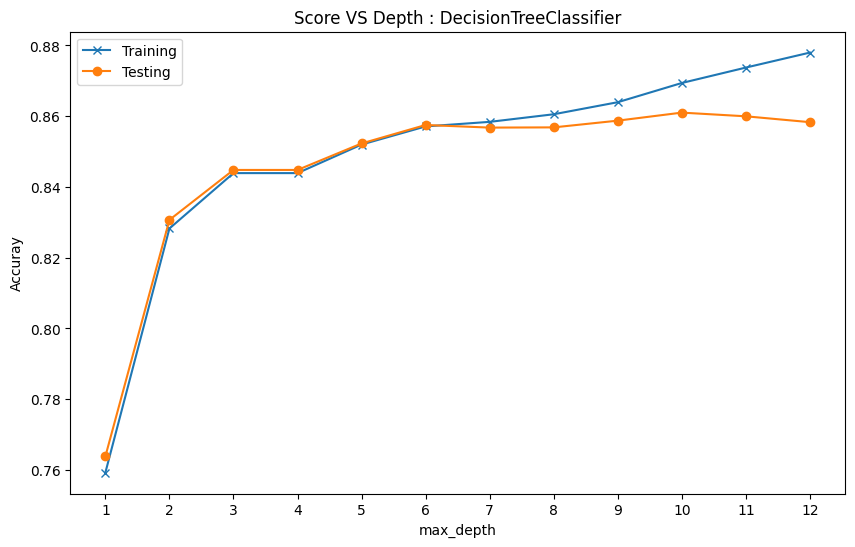

Accuracy scores for RFC- Training [0.7591904425539756, 0.7695402475353951, 0.7910690703602469, 0.8264795307269432, 0.8392862627069193, 0.8453978686158288, 0.8509873775375449, 0.8557783851847302, 0.8568840023340807, 0.8645618992045699, 0.8660667669911858, 0.8703663892386597]
Accuracy scores for RFC - Testing [0.7637737239727289, 0.7731097598427615, 0.7939315766844789, 0.8256249616116946, 0.8386462747988452, 0.8436213991769548, 0.8498249493274369, 0.8530802776242246, 0.852158958294945, 0.8590995639088508, 0.8585467723112831, 0.8611264664332657]


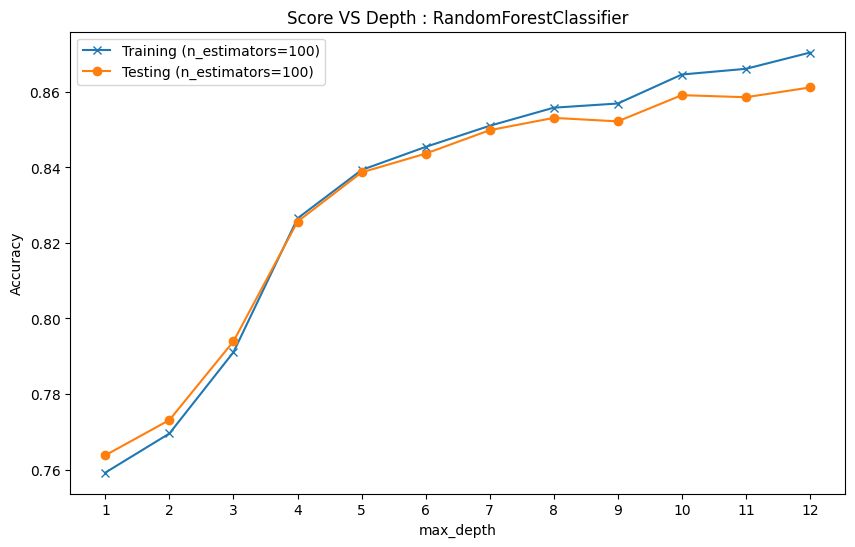

In [95]:
plot_evaluation_DTC(training_dict,Y_train,testing_dict,Y_test)
plot_evaluation_RFC(training_dict,Y_train,testing_dict,Y_test)

The following function call is a graph plotted for the same function "plot_evaluation_RFC()". However, the hyperparameter "n_estimator" is set to "1". The code for the graph is given below. Apologies for the incorrect value for the "n_estimators" in the legend of the graph.


```
def plot_evaluation_RFC(xtrain, ytrain, xtest, ytest):
  # setting the range of max_depth to (1,13)
  values_max_depths = range(1,13)
  values_n_estimators = range(1, 101)
  for n_estimators in values_n_estimators:
    training_scores, testing_scores = [], []
    for max_depth in values_max_depths:
      # Creating a pipeline as mentioned in the assignment description
      pipeline = make_pipeline( DictVectorizer(), RandomForestClassifier(max_depth=max_depth, n_estimators=1,n_jobs=-1))
      # Fitting the training data using pipeline.fit()
      pipeline.fit(xtrain, ytrain)
      # Predicting using pipeline.predict() on xtrain
      predict_train = pipeline.predict(xtrain)
      # calculating accuracy for train using accuracy_score()
      accuracy_train = accuracy_score(ytrain,predict_train)
      training_scores.append(accuracy_train)

      # Predicting using pipeline.predict() on xtest
      predict_test = pipeline.predict(xtest)
      # calculating accuracy for test using accuracy_score()
      accuracy_test = accuracy_score(ytest, predict_test)
      testing_scores.append(accuracy_test)
  print("Accuracy scores for RFC- Training",training_scores)
  print('Accuracy scores for RFC - Testing',testing_scores)
  
  plt.figure(figsize=(10,6))
  plt.plot(values_max_depths, training_scores, label=f'Training (n_estimators={n_estimators})', marker='x')
  plt.plot(values_max_depths, testing_scores, label=f'Testing (n_estimators={n_estimators})', marker='o')
  plt.title('Score VS Depth : RandomForestClassifier')
  plt.xlabel('max_depth')
  plt.ylabel('Accuracy')
  plt.xticks(values_max_depths, rotation='horizontal')
  plt.legend()
  plt.show()
```



Accuracy scores for RFC- Training [0.7591904425539756, 0.7591904425539756, 0.8033229937655477, 0.7658241454500783, 0.7577469979423236, 0.8184330948066706, 0.8362765271336875, 0.8369521820582906, 0.8297349590000307, 0.8386413193697982, 0.8463806394152513, 0.8313319615490925]
Accuracy scores for RFC - Testing [0.7637737239727289, 0.7637737239727289, 0.8052945150789264, 0.768134635464652, 0.7567716970702045, 0.8196056753270684, 0.8413488114980652, 0.8344082058841594, 0.8274676002702537, 0.8347767336158712, 0.8411031263435906, 0.824887906148271]


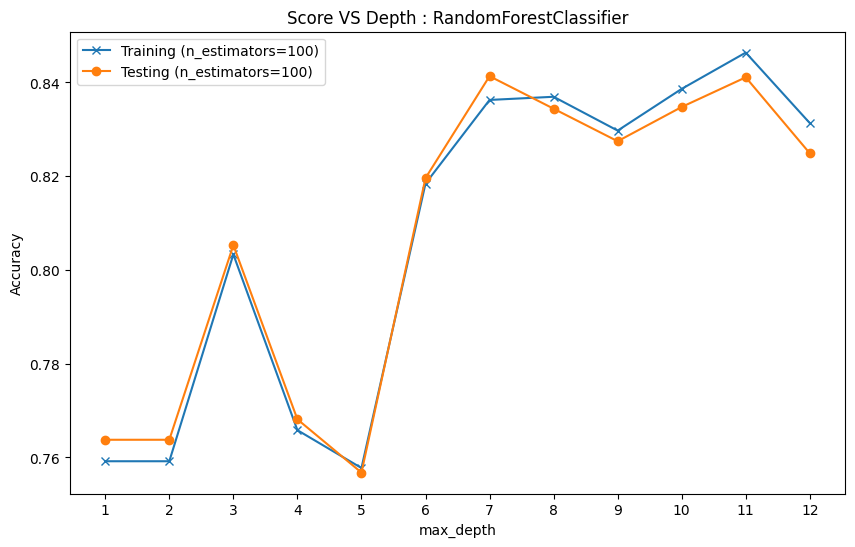

In [99]:
plot_evaluation_RFC(training_dict,Y_train,testing_dict,Y_test)



1.  **What's the difference between the curve for a decision tree and for a random forest with anensemble size of 1, and why do we see this difference?**

    In the case of a Decision Tree, when the maximum depth is increased, the model is prone to overfitting. However, as the depth of the tree increases, the model tends to capture complex patterns in the  training data. This might be the reason for the higher accuracies which evidently proves overfitting. The graph adds more proof for overfitting as the curve for the testing did not have the gradual increase like training set curve did.

    In contrast, the random forest classifier, with an ensemble size of 1, is just a random forest with a single decision tree. The curve plotted for the RF, where the hyperparameter "n_estimators" is set to 1, had fluctuations. The reason for this is that the model might have been overfitted as the RF had only one decision tree. At a certain max_depth, both the curve decreased which is evidently due to overfitting.

    In conclusion, the main difference between the two models shows the affect of overfitting and the RFC's ability to mitigate it by increasing the number of ensembles.

2.   **What happens with the curve for random forests as the ensemble size grows?**

    It is observed that the accuracy of both curve gradually increased as the max_depth increase. This experiment is done with n_estimators being increased from 1 to 100. Random Forest, when the number of ensembles increases, tends to increase it's accuracy while capturing complex patterns. This is due to the reason that there are several decision trees that help in mitigating overfitting.
  
3.   **What happens with the best observed test set accuracy as the ensemble size grows?**

    As the ensemble size increases, the test accuracy increases steadily. This is due to a principle which generally called "Wisdom of the crowd". The more the ensemble size, more the number of decision trees, higher the accuracy. Increasing ensemble size have many advantages such as variance reduction, generalization, overfitting prevention, and stabilization. Although increasing ensemble size increases accuracy of the model, the accuracy after certain point does not increase when the RF reached sufficient size. Increasing ensemble size increase the training and computaional time. Therefore, it is a lot better if the right hyperparameters are tuned.

4.  **What happens with the training time as the ensemble size grows?**

    As the size of ensemble increases, more decision trees are added to the random forest which are used to catch complex patterns in the training data. Although increasing ensemble size increases accuracy of the model, it also increases the training time of the model. In cases where the ensemble sizes is required to be large, it is recommended to tune the hyperparameter "njobs" which increases the number of CPU cores working. Additionally, RF supports parallelization. Various optimization techniques such as subsampling can be used to reduce training time.

